## Ender Pearl Trade
Monte Carlo Simulation 
Src: https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# Define constants
ENDER_PEARL_PROBABILITY = 0.0218  # Probability of ender pearl trade
NUM_SIMULATIONS = 1000  # Number of simulations

In [143]:
def simulate_trades():
    ender_pearl_trades = 0
    total_trades = 0
    while ender_pearl_trades < 1:
        total_trades += 1
        if np.random.random() < ENDER_PEARL_PROBABILITY:
            ender_pearl_trades += 1
    return total_trades

In [144]:
def simulate_4_trades():
    ender_pearl_trades = 0
    trade_number = 0
    while ender_pearl_trades < 4:
        trade_number += 1
        if np.random.random() < ENDER_PEARL_PROBABILITY:
            ender_pearl_trades += 1
    return trade_number

In [145]:
# Simulate trades
trade_results = [simulate_trades() for _ in range(NUM_SIMULATIONS)]
trade_number = [simulate_4_trades() for _ in range(NUM_SIMULATIONS)]

In [146]:
# Analyze results
average_trades = np.mean(trade_results)
average_trade_number = np.mean(trade_number)
print("Average number of trades to get ender pearl trades:", average_trades)
print("Average number of trades to get 4 ender pearl trades:", average_trade_number)

Average number of trades to get ender pearl trades: 46.171
Average number of trades to get 4 ender pearl trades: 186.267


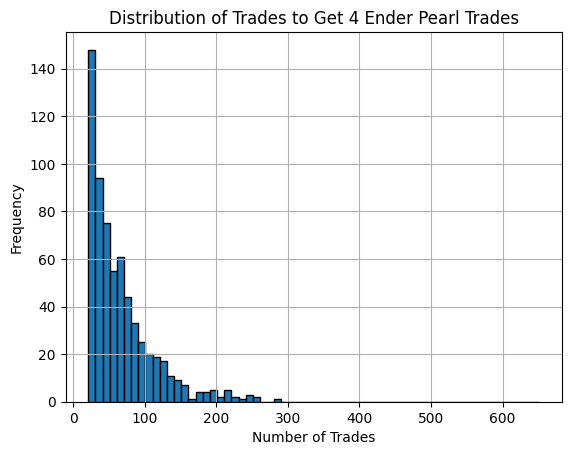

In [147]:
# Plot histogram
plt.hist(trade_number, bins=range(min(trade_number), max(trade_number) + 1, 10), edgecolor='black')
plt.xlabel('Number of Trades')
plt.ylabel('Frequency')
plt.title('Distribution of Trades to Get 4 Ender Pearl Trades')
plt.grid(True)
plt.show()